In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm

In [2]:
import gensim.downloader as api
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec

In [3]:
dataset = api.load('text8')

In [4]:
data = [d for d in dataset]

In [5]:
len(data)

1701

In [6]:
# 문서 내에 있는 총 단어의 개수는 몇개 인가요?
total_words = sum(len(w) for w in data)
total_words

17005207

In [7]:
partial_data = data[:int(len(data) * 0.3)]
len(partial_data)

510

In [8]:
sum(len(d) for d in partial_data)

5100000

In [9]:
class Epochlogger(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0
    def on_epoch_end(self, model):
        self.epoch += 1
        if self. epoch % 2 == 0:
            print(f'Epoch {self.epoch} 완료')

In [11]:
model_en = Word2Vec(
    sentences=partial_data,
    vector_size=150,
    window=10,
    min_count=5,
    sg=1,
    epochs=10,
    callbacks=[Epochlogger()]
)

Epoch 2 완료
Epoch 4 완료
Epoch 6 완료
Epoch 8 완료
Epoch 10 완료


In [ ]:
len(model_en.wv)  # vocab 크기

36761

In [ ]:
model_en.wv.vector_size

150

In [ ]:
model_en.wv.most_similar('computer', topn=5)

[('computers', 0.7792927026748657),
 ('hardware', 0.7727739810943604),
 ('computing', 0.7378100752830505),
 ('software', 0.7105504274368286),
 ('smalltalk', 0.6790242791175842)]

In [ ]:
model_en.wv.most_similar('apple', topn=5)

[('macintosh', 0.8006216883659363),
 ('iigs', 0.7315453886985779),
 ('iic', 0.689807653427124),
 ('microsoft', 0.664053738117218),
 ('iie', 0.6587063670158386)]

In [ ]:
model_en.wv.most_similar('water', topn=5)

[('sewage', 0.6460537910461426),
 ('seawater', 0.641470193862915),
 ('potable', 0.6230487823486328),
 ('groundwater', 0.6226524710655212),
 ('sediment', 0.6221335530281067)]

In [ ]:
analogies = [
    (['king', 'woman'], ['man'], "king - man + woman = ?"),
    (['france', 'berlin'], ['paris'], "france - paris + berlin = ?"),
    (['bigger', 'cold'], ['big'], "bigger - big + cold = ?"),
]

In [ ]:
for pos, neg, desc in analogies:
    result = model_en.wv.most_similar(positive=pos, negative=neg, topn=5)
    for word, score in result:
        print(f'{word}: {score:.4f}')
    print('=====')

consort: 0.5478
daughter: 0.5420
queen: 0.5282
concubine: 0.5256
wife: 0.5199
=====
germany: 0.6721
gdr: 0.5714
republik: 0.5423
austria: 0.5381
cisleithania: 0.5015
=====
snowy: 0.4565
thickly: 0.4484
fresher: 0.4419
cloudy: 0.4375
dry: 0.4370
=====


In [20]:
def word_analogy(model, a, b, c, topn=5):
    # 단어 유추 : a - b + c = ?
    # 예; king - man + woman = ? queen
    result = model.wv.most_similar(positive=[a, c], negative=[b], topn=topn)
    for word, score in result:
        print(f'{word}: {score:.4f}')

In [23]:
def word_analogy(model, a, b, c, topn=5):
    # 단어 유추 : a - b + c = ?
    # 예; king - man + woman = ? queen
    for word in [a,b,c]:
        if word not in model.wv:
            print(f'경고, 단어 {word}가 없습니다.')
            return []
        
    return model.wv.most_similar(positive=[a, c], negative=[b], topn=topn)

In [24]:
word_analogy(model_en, 'snow', 'white', 'man')

[('grail', 0.4317464232444763),
 ('ghost', 0.4273451864719391),
 ('ice', 0.4170392155647278),
 ('nigga', 0.41647011041641235),
 ('lunatic', 0.4159081280231476)]

In [25]:
from kiwipiepy import Kiwi

In [27]:
import os
import urllib

In [28]:
os.makedirs("./content", exist_ok=True)
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt",
    "./content/ratings_train.txt"
)

('./content/ratings_train.txt', <http.client.HTTPMessage at 0x1f9957d0150>)

In [31]:
train_data = pd.read_table('./content/ratings_train.txt')

In [32]:
train_data.drop_duplicates(subset=['document'], inplace=True)

In [33]:
train_data = train_data.dropna(how='any')

In [36]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ-가-힣 ]","",regex=True)
train_data.head(20)

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
5,5403919,막 걸음마 뗀 세부터 초등학교 학년생인 살용영화ㅋㅋㅋ별반개도 아까움,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지정말 발로해도 그것보단 낫...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나,1


In [37]:
train_data = train_data[train_data['document'].str.strip() != '']
len(train_data)

145420

In [42]:
train_data['document'].tail(20)

149979                                             배우들이 아깝다
149980                    아 진짜 웃긴다프랑스 영화 정말 싫어했었는데 이 영화는 열외
149981    시간이 아깝다 어린 여주의 연기는 인상적이었고 나중이 기대되어서 좋았고 남주 여주 ...
149982             평점너무낮아서 십점줌ㅋㅋㅋㅋ난진짜재밌던데 이런가벼운영화도 한번씩보면좋을듯
149983                  그냥생각없이 평점좀 쓰지마 들아 두 배우의연기가 너무맘에 들었다
149984             수술할정도로 아파본사람들만이 제대로 동감할수 있는영화삶의 소중함과 고마움
149985                            해석하기 나름인 패륜영화 그래도 이건 아니잖니
149986                                  점도아깝다진짜 개빡친다 내아까운시간
149988                   와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔
149989         아직 척편이여서 그런지 모르겠지만 내용 이해 불가가지 그림자가 뭔지 모르겠습니다
149990                                          이걸 영화라고 찎었냐
149991     나쁜 인상은 아니지만오랫동안 기억에 남아종종 떠올라서조금은 사람을 피곤하게 만드는...
149992    공포나 재난영화가 아니라 아예 대놓고 비급 크리쳐개그물임ㅋㅋ 음악 완전 흥겹다ㅋ 점...
149993                             칼 세이건으로 시작해서 칼 세이건으로 끝난다
149994                  디케이드 다음에 더블 다음에 오즈인데 더블은 조금밖에 안나오네요
149995                                      인간이 문제지 소는 뭔죄인가
149996                                  

In [ ]:
from kiwipiepy import Kiwi

In [49]:
kiwi = Kiwi()

tokenized_data = []

for review in tqdm(train_data['document'], desc='tokenization'):
    result = kiwi.tokenize(str(review))
    tokens = [token.form for token in result if len(token.form) > 1]
    tokenized_data.append(tokens)

tokenization: 100%|██████████| 145420/145420 [01:08<00:00, 2121.01it/s]


In [50]:
len(tokenized_data)

145420

In [51]:
tokenized_data[0]

['더빙', '진짜', '짜증', '네요', '목소리']

In [53]:
model_ko = Word2Vec(
    sentences=tokenized_data,
    vector_size=300,
    window=10,
    min_count=5,
    sg=1,
    epochs=20,
    callbacks=[Epochlogger()]
)

Epoch 2 완료
Epoch 4 완료
Epoch 6 완료
Epoch 8 완료
Epoch 10 완료
Epoch 12 완료
Epoch 14 완료
Epoch 16 완료
Epoch 18 완료
Epoch 20 완료


In [54]:
len(model_ko.wv)

11180

In [55]:
for target in ['영화', '배우', '재미', '감독']:
    try: 
        for word, score in model_ko.wv.most_similar(target, topn=5):
            print(f'{word}: {score:.4f}')
    except KeyError:
        print('no word')
    print('=====')

가나다라: 0.5266
ㅣㅇ: 0.5111
ㄱㅅ: 0.5091
스푼: 0.4941
ㅎㅎㅎㅎㅎㅎㅎㅎ: 0.4791
=====
연기: 0.4897
브릿: 0.4814
라인업: 0.4778
이진: 0.4754
제프 브리지: 0.4693
=====
이고: 0.4042
다나: 0.3848
솔솔: 0.3831
재밌: 0.3831
에볼루션: 0.3817
=====
역량: 0.4250
남기남: 0.4204
초기작: 0.4153
이창동: 0.4119
장진: 0.4026
=====


In [56]:
# 이정재의 여자버전?
# king - man + woman
result = model_ko.wv.most_similar(positive=['이정재','여자'], negative=['남자'])
result

[('제니퍼 러브 휴잇', 0.37541088461875916),
 ('정윤', 0.35432758927345276),
 ('송은채', 0.35231098532676697),
 ('김동욱', 0.34993112087249756),
 ('종려시', 0.3496569097042084),
 ('김민정', 0.3398083448410034),
 ('한세아', 0.3276205360889435),
 ('최재성', 0.3275943398475647),
 ('심은경', 0.3274994492530823),
 ('이유리', 0.3274945616722107)]

In [58]:
model_ko.wv.doesnt_match(['영화', '배우', '재미', '축구'])

'축구'

In [ ]:
# '조명'과 가장 유사한 단어가 무엇인가요?
# 마동석 - 근육 + 코미디
# ['액션', '로맨스', '공포', '코미디'] 중 가장 다른 단어를 찾아주세요
# 감동 재미 코사인 유사도를 출력해주세요

In [62]:
model_ko.wv.most_similar('조명', topn=5)

[('중시', 0.3825732171535492),
 ('사드', 0.3576306998729706),
 ('태조', 0.35300421714782715),
 ('ᆫ다면서', 0.3471747040748596),
 ('파업', 0.34319576621055603)]

In [63]:
model_ko.wv.most_similar(positive=['마동석', '코미디'], negative=['근육'])

[('베니', 0.3493311405181885),
 ('분류', 0.3444593846797943),
 ('로멘틱', 0.3425043821334839),
 ('송새벽', 0.3393194377422333),
 ('로맨틱', 0.336342990398407),
 ('김규리', 0.3184671401977539),
 ('코미디물', 0.3100457191467285),
 ('조크', 0.30590686202049255),
 ('그렇지', 0.3055030107498169),
 ('김꽃비', 0.3038965165615082)]

In [60]:
model_ko.wv.doesnt_match(['액션', '로맨스', '공포', '코미디'])

'로맨스'

In [ ]:
model_ko.wv.similarity('감동', '재미')

np.float32(0.32569048)

In [66]:
# Word2vec 의 문제 : vocab 에 없는 단어를 못 찾는다.

In [67]:
# FastText

In [69]:
# where wh he re re / whe her ere

In [70]:
from gensim.models import FastText

In [71]:
model_ft = FastText(
    sentences=tokenized_data,
    vector_size=100,
    window=5,
    min_count=5,
    min_n=2,
    max_n=6,
    sg=1,
    epochs=20,
    callbacks=[Epochlogger()]
)

Epoch 2 완료
Epoch 4 완료
Epoch 6 완료
Epoch 8 완료
Epoch 10 완료
Epoch 12 완료
Epoch 14 완료
Epoch 16 완료
Epoch 18 완료
Epoch 20 완료


In [72]:
len(model_ko.wv)

11180

In [73]:
len(model_ft.wv)

11180

In [74]:
model_ft.wv.most_similar('슬프다', topn=3)

[('슬프', 0.7755886316299438),
 ('왈칵', 0.690259575843811),
 ('슬쩍', 0.6499441862106323)]

In [75]:
model_ft.wv.most_similar('영화관람', topn=3)

[('영화관', 0.8866588473320007),
 ('극장', 0.7417440414428711),
 ('관람', 0.7336979508399963)]

In [76]:
model_ko.wv.most_similar(positive=['마동석', '코미디'], negative=['근육'])

[('베니', 0.3493311405181885),
 ('분류', 0.3444593846797943),
 ('로멘틱', 0.3425043821334839),
 ('송새벽', 0.3393194377422333),
 ('로맨틱', 0.336342990398407),
 ('김규리', 0.3184671401977539),
 ('코미디물', 0.3100457191467285),
 ('조크', 0.30590686202049255),
 ('그렇지', 0.3055030107498169),
 ('김꽃비', 0.3038965165615082)]

In [77]:
model_ko, model_ft

(<gensim.models.word2vec.Word2Vec at 0x1f9a38d2dd0>,
 <gensim.models.fasttext.FastText at 0x1f9a3fcaf90>)

In [80]:
overlaps = []
test_words = ['영화', '배우', '감독', '재미', '연기']
for word in test_words:
    w2v_sim = set(w for w,_ in model_ko.wv.most_similar(word, topn=10))
    ft_sim = set(w for w,_ in model_ft.wv.most_similar(word, topn=10))
    
    overlap = len(w2v_sim & ft_sim) / 10 * 100
    print(f'{word} : {w2v_sim & ft_sim} overlap 비율 : {overlap:.2f}%')

영화 : {'슬래셔무비'} overlap 비율 : 10.00%
배우 : {'고준', '이홍'} overlap 비율 : 20.00%
감독 : {'장진', '역량'} overlap 비율 : 20.00%
재미 : {'재밌', '이고', '재미없'} overlap 비율 : 30.00%
연기 : {'연기력', '이진'} overlap 비율 : 20.00%


In [81]:
glove = api.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [84]:
len(glove)

400000

In [286]:
glove.vector_size

100

In [82]:
for word in ['computer', 'music', 'korea']:
    for w, s in glove.most_similar(word, topn=5):
        print(f'{w}: {s}')
    print('=====')

computers: 0.8751984238624573
software: 0.8373122215270996
technology: 0.7642159461975098
pc: 0.7366448640823364
hardware: 0.7290390729904175
=====
musical: 0.8128045797348022
songs: 0.7978180646896362
dance: 0.7896507382392883
pop: 0.7862942218780518
recording: 0.7650765776634216
=====
pyongyang: 0.8227901458740234
korean: 0.806920051574707
dprk: 0.7862391471862793
seoul: 0.7670401930809021
japan: 0.76695317029953
=====


In [83]:
for word in ['apple', 'water']:
    for w, s in glove.most_similar(word, topn=5):
        print(f'{w}: {s}')
    print('=====')

microsoft: 0.7449405193328857
ibm: 0.6821643114089966
intel: 0.6778088212013245
software: 0.6775422692298889
dell: 0.6741442680358887
=====
natural: 0.6995721459388733
dry: 0.6769977807998657
salt: 0.6769736409187317
clean: 0.6751622557640076
drinking: 0.6749323606491089
=====


In [93]:
# 'king' - 'man' + 'woman'
# 'paris' - 'france' + 'japan'
# 'walking' - 'walked' + 'swan'


analogies = [
    (['king', 'woman'], ['man'], 'king - man + woman = ?'),
    (['paris', 'japan'], ['france'], 'paris - france + japan = ?'),
    (['walking', 'swan'], ['walked'], 'walking - walked + swan = ?')
]

In [95]:
for pos, neg, desc in analogies:
    print(f'\n{desc}')
    result = glove.most_similar(positive=pos, negative=neg, topn=5)
    for w, s in result: 
        print(f'{w}: {s}')


king - man + woman = ?
queen: 0.7698540687561035
monarch: 0.6843381524085999
throne: 0.6755736470222473
daughter: 0.6594556570053101
princess: 0.6520534157752991

paris - france + japan = ?
tokyo: 0.8993858695030212
osaka: 0.7420609593391418
japanese: 0.7059352993965149
seoul: 0.6949185132980347
shanghai: 0.6678785681724548

walking - walked + swan = ?
wonderland: 0.6027202606201172
cat: 0.5614201426506042
ghost: 0.5314646363258362
goose: 0.5278069376945496
dragon: 0.5060429573059082


In [96]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [119]:
def visualize_embeddings(model, seed_words, method='pca', topn=10):
    all_words, all_vectors, colors=[],[],[]
    
    for idx, word in enumerate(seed_words):
        if word not in model:
            continue
        all_words.append(f'{word}')
        all_vectors.append(model[word])
        colors.append(idx)
        
        for sim_word, _ in model.most_similar(word, topn=topn):
            all_words.append(sim_word)
            all_vectors.append(model[sim_word])
            colors.append(idx)
    
    vectors = np.array(all_vectors)
    if method == 'tsne':
        prep = min(30, len(vectors) -1)
        reduced = TSNE(n_components=2, perplexity=prep).fit_transform(vectors)
    else:
        reduced = PCA(n_components=2).fit_transform(vectors)
    
    plt.figure(figsize=(14,10))
    cmap = plt.cm.tab10
    for idx, word in enumerate(seed_words):
        mask = [c == idx for c in colors]
        coords = reduced[mask]
        plt.scatter(coords[:,0], coords[:,1], c=[cmap(idx)], label=word, alpha=0.7, s=60)
    for i, word in enumerate(all_words):
        plt.annotate(word, (reduced[i, 0], reduced[i,1]), fontsize=8, alpha=0.8)
    plt.title('Word Embedding')
    plt.show()

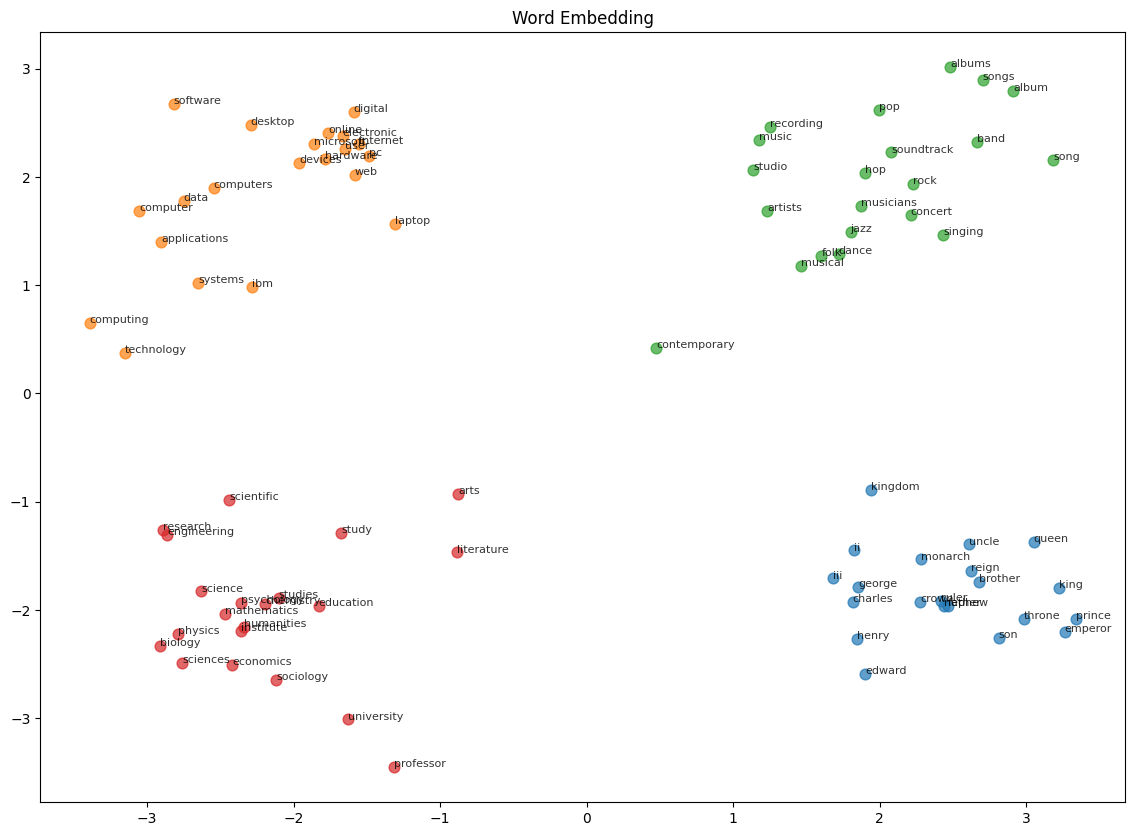

In [120]:
visualize_embeddings(glove, ['king', 'computer', 'music', 'science'], method='pca', topn=20)

In [111]:
def visualize_clusters(model, word_groups, method='pca'):
    """
    model: gensim Word2Vec 모델 또는 KeyedVectors
    word_groups: {"그룹명": ["단어1", "단어2", ...], ...}
    method: 'pca' 또는 'tsne'
    """
    kv = model.wv if hasattr(model, "wv") else model

    if not isinstance(word_groups, dict) or not word_groups:
        raise ValueError("word_groups는 {'group': ['word1', ...]} 형태의 dict여야 합니다.")

    words, groups, vectors, missing = [], [], [], []
    for group_name, group_words in word_groups.items():
        for w in group_words:
            if w in kv:
                words.append(w)
                groups.append(group_name)
                vectors.append(kv[w])
            else:
                missing.append(w)

    if len(vectors) < 2:
        raise ValueError("시각화 가능한 단어 벡터가 2개 이상 필요합니다.")

    X = np.vstack(vectors)

    m = method.lower()
    if m == "pca":
        reducer = PCA(n_components=2)
        Z = reducer.fit_transform(X)
    elif m in ("tsne", "t-sne"):
        perplexity = min(30, len(X) - 1)
        perplexity = max(2, perplexity)
        reducer = TSNE(
            n_components=2,
            random_state=42,
            init="pca",
            learning_rate="auto",
            perplexity=perplexity
        )
        Z = reducer.fit_transform(X)
    else:
        raise ValueError("method는 'pca' 또는 'tsne'만 가능합니다.")

    plt.figure(figsize=(10, 8))
    uniq = list(dict.fromkeys(groups))
    color_map = plt.cm.tab10(np.linspace(0, 1, max(1, len(uniq))))
    groups_np = np.array(groups)

    for i, g in enumerate(uniq):
        idx = np.where(groups_np == g)[0]
        plt.scatter(Z[idx, 0], Z[idx, 1], s=90, alpha=0.85, label=g, color=color_map[i])
        for j in idx:
            plt.text(Z[j, 0] + 0.01, Z[j, 1] + 0.01, words[j], fontsize=9)

    plt.title(f"Word Clusters ({m.upper()})")
    plt.legend(title="Group")
    plt.grid(alpha=0.2)
    plt.show()

    if missing:
        print(f"[참고] vocab에 없는 단어 {len(missing)}개: {missing}")

    return pd.DataFrame({"word": words, "group": groups, "x": Z[:, 0], "y": Z[:, 1]})

In [ ]:
def visualize_clusters(model, word_groups, method='pca'):
    all_words, all_vectors, colors = [], [], []
    
    for group, words in word_groups.items():
        for w in words:
            if w in model:
                all_words.append(w)
                all_vectors.append(model[w])
                colors,append(group)
                
    if not all_vectors:
        print("시각화 할 단어가 없습니다.")
        return

    vectors = np.array(all_vectors)
    if method == 'tsne':
        prep = min(30, len(vectors) - 1)
        reduced = TSNE(n_components=2, perplexity=prep).fit_transform(vectors)
    else:
        reduced = PCA(n_components=2).fit_transform(vectors)
    
    plt.figure(figsize=(14,10))
    
    for group in word_groups.keys():
        mask = [g == group in ]

In [112]:
word_groups = {
    'royalty': ['king', 'queen', 'prince', 'princess', 'throne', 'crown'],
    'animals': ['cat', 'dog', 'horse', 'bird', 'fish', 'lion'],
    'tech': ['computer', 'software', 'internet', 'algorithm', 'data', 'code']
}

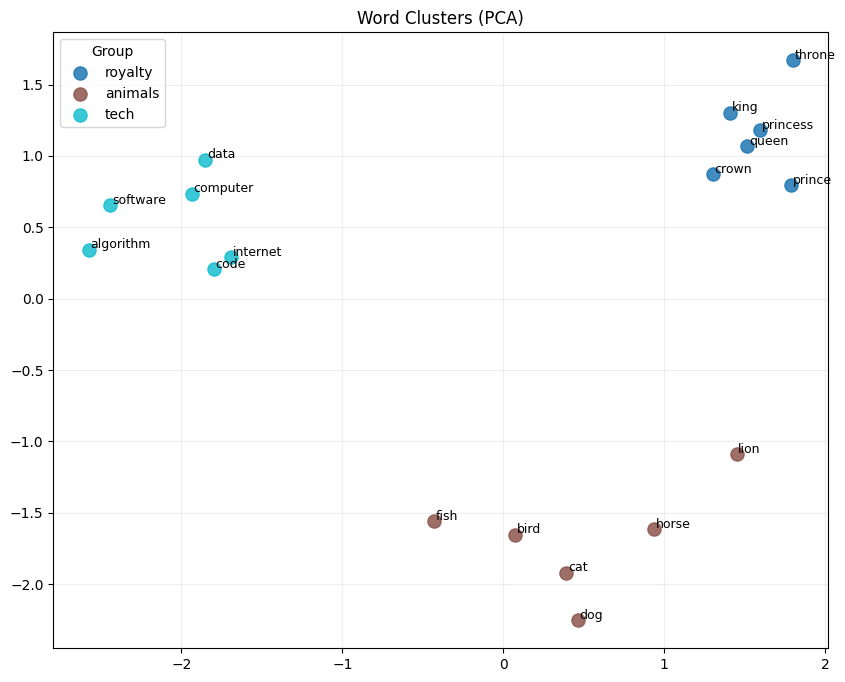

,word,group,x,y
0,king,royalty,1.408659,1.303976
1,queen,royalty,1.516477,1.065974
2,prince,royalty,1.787791,0.794926
3,princess,royalty,1.595443,1.178496
4,throne,royalty,1.799841,1.669982
5,crown,royalty,1.299803,0.873258
6,cat,animals,0.391547,-1.919119
7,dog,animals,0.461136,-2.253508
8,horse,animals,0.938389,-1.613096
9,bird,animals,0.071149,-1.652701


In [116]:
visualize_clusters(model_en, word_groups, method="pca")

In [282]:
word_groups.items()

dict_items([('royalty', 10), ('animals', 7), ('tech', 5)])

In [283]:
word_groups.keys()

dict_keys(['royalty', 'animals', 'tech'])

In [284]:
all_words = ['a', 'b', 'c', 'd', 'e']
colors = [1, 2, 3, 4, 5]

In [285]:
[w for w, g in zip(all_words, colors) if g == 3]

['c']

In [125]:
# man     police      woman

In [126]:
prof = 'engineer'
gender_vector = glove['man'] - glove['woman']
prof_vec = glove[prof]

sim = np.dot(prof_vec, gender_vector) / (np.linalg.norm(prof_vec) * np.linalg.norm(gender_vector))
sim

np.float32(0.123000115)

In [128]:
def analyze_gender_bias(glove, professions):
    kv = glove.wv if hasattr(glove, "wv") else glove

    male_words = ["man", "male", "he", "him", "his", "boy"]
    female_words = ["woman", "female", "she", "her", "hers", "girl"]

    def get_vec(word):
        cands = [
            str(word),
            str(word).lower(),
            str(word).replace(" ", "_"),
            str(word).lower().replace(" ", "_"),
        ]
        for w in dict.fromkeys(cands):
            try:
                return kv[w], w
            except KeyError:
                continue
        return None, None

    def mean_vec(words):
        vecs = []
        for w in words:
            v, _ = get_vec(w)
            if v is not None:
                vecs.append(v)
        if not vecs:
            raise ValueError("Gender anchor words are not in vocabulary.")
        return np.mean(vecs, axis=0)

    def cosine(a, b):
        return float(np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b) + 1e-12))

    male_center = mean_vec(male_words)
    female_center = mean_vec(female_words)

    rows = []
    missing = []

    for p in professions:
        v, found = get_vec(p)
        if v is None:
            missing.append(p)
            continue

        male_sim = cosine(v, male_center)
        female_sim = cosine(v, female_center)
        bias_score = male_sim - female_sim  # +: male-leaning, -: female-leaning

        rows.append(
            {
                "profession": p,
                "token_used": found,
                "male_sim": male_sim,
                "female_sim": female_sim,
                "bias_score": bias_score,
            }
        )

    df = pd.DataFrame(rows).sort_values("bias_score", ascending=False).reset_index(drop=True)

    if not df.empty:
        plot_df = df.sort_values("bias_score")
        plt.figure(figsize=(10, max(4, len(plot_df) * 0.35)))
        sns.barplot(data=plot_df, x="bias_score", y="profession", palette="vlag")
        plt.axvline(0, color="black", linewidth=1)
        plt.title("Gender Bias by Profession (male_sim - female_sim)")
        plt.xlabel("Bias score")
        plt.ylabel("Profession")
        plt.tight_layout()
        plt.show()

    if missing:
        print(f"[OOV] Not found in vocab: {missing}")

    return df

C:\Users\amy\AppData\Local\Temp\ipykernel_108484\1505183448.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x="bias_score", y="profession", palette="vlag")


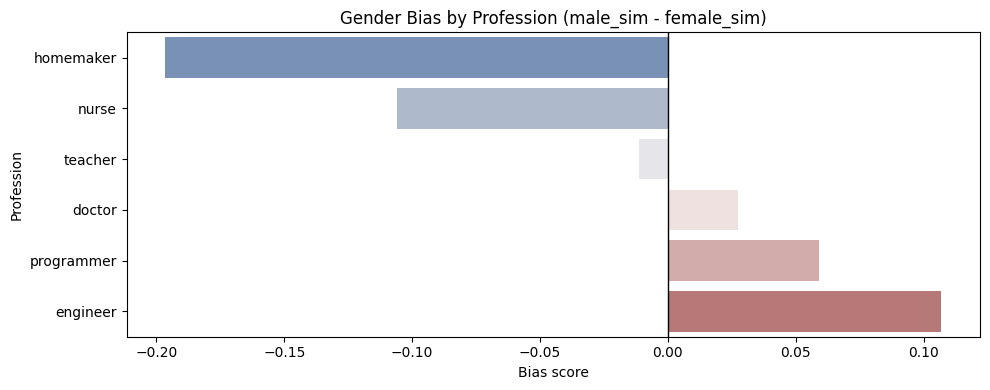

,profession,token_used,male_sim,female_sim,bias_score
0,engineer,engineer,0.405959,0.299109,0.106850
1,programmer,programmer,0.242591,0.183512,0.059079
2,doctor,doctor,0.649663,0.622210,0.027453
3,teacher,teacher,0.606116,0.617285,-0.011170
4,nurse,nurse,0.493164,0.598979,-0.105816
5,homemaker,homemaker,0.168218,0.364675,-0.196457


In [129]:
professions = ["doctor", "nurse", "engineer", "teacher", "programmer", "homemaker"]
bias_df = analyze_gender_bias(glove, professions)
bias_df

In [265]:
def analyze_gender_bias(glove, professions):
    gender_vector = glove['he'] - glove['she']
    bias_scores = {}
    for prof in professions:
        if prof in glove:
            prof_vec = glove[prof]
            sim = np.dot(prof_vec, gender_vector) / (np.linalg.norm(prof_vec) * np.linalg.norm(gender_vector))
            bias_scores[prof] = sim
    sorted_scores = sorted(bias_scores.items(), key = lambda x: x[1])

    print("여성편향 ------------------------------- 남성편향")
    for prof, score in sorted_scores:
        bar_pos = int((score+0.5) * 40)
        bar_pos = max(0, min(39, bar_pos))
        bar = list("." * 40)
        bar[bar_pos] = "■"
        print(f"{prof} [{''.join(bar)}] {score:+.3f}")

In [266]:
professions = ['nurse', 'doctor', 'teacher', ]

analyze_gender_bias(glove, professions)

여성편향 ------------------------------- 남성편향
nurse [........■...............................] -0.295
teacher [................■.......................] -0.092
doctor [.................■......................] -0.066


In [267]:
word_groups

{'royalty': ['king', 'queen', 'prince', 'princess', 'throne', 'crown'],
 'animals': ['cat', 'dog', 'horse', 'bird', 'fish', 'lion'],
 'tech': ['computer', 'software', 'internet', 'algorithm', 'data', 'code']}

In [268]:
word_groups = {'royalty': 10,
 'animals': 7,
 'tech': 5}


In [269]:
word_groups.items()

dict_items([('royalty', 10), ('animals', 7), ('tech', 5)])

In [270]:
sorted(word_groups.items(), key = lambda x: x[1])

[('tech', 5), ('animals', 7), ('royalty', 10)]

In [271]:
new_vector = glove['science'] + glove['art']
glove.most_similar(positive = [new_vector], topn=10)

[('science', 0.905344545841217),
 ('art', 0.9013387560844421),
 ('arts', 0.8450597524642944),
 ('literature', 0.7529236078262329),
 ('museum', 0.7276580929756165),
 ('works', 0.7253602147102356),
 ('history', 0.7253273725509644),
 ('society', 0.7200292348861694),
 ('sciences', 0.7186616063117981),
 ('institute', 0.7160500288009644)]

In [272]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from kiwipiepy import Kiwi

In [273]:
# stu dy
# stu died                school, homework, 
# stu dies
# stu dying
# stu dent

In [274]:
# 동시확률행렬

In [275]:
               #       school study student hopital car racing
               # school         100           3       1   0
               # study
               # studnet
               #   ...

In [276]:
# I study english ~~~~~~~.

In [277]:
# word2vec doc2vec

In [278]:
train_data = pd.read_table('./content/ratings_train.txt').dropna()

In [279]:
train_data.head(10)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [280]:
kiwi = Kiwi()
tagged_data = []
for i, row in tqdm(train_data.head(30000).iterrows(), total=30000, desc='tokenization'):
    tokens = [t.form for t in kiwi.tokenize(str(row['document']))]
    tagged_data.append(TaggedDocument(words=tokens, tags=[str(i)]))

tokenization: 100%|██████████| 30000/30000 [00:17<00:00, 1682.04it/s]


In [281]:
tagged_data[10]

TaggedDocument(words=['걍', '인피니트', '가', '짱', '이', '다', '.', '진짜', '짱', '이', '다', '♥'], tags=['10'])

In [175]:
model_d2v = Doc2Vec(
    vector_size=100,
    window=5,
    min_count=5,
    epochs=20,
    callbacks=[Epochlogger()]
)

In [176]:
model_d2v.build_vocab(tagged_data)

In [177]:
model_d2v.corpus_count

30000

In [178]:
model_d2v.train(tagged_data, total_examples=model_d2v.corpus_count, epochs=model_d2v.epochs)

In [179]:
doc_id = 10
similar = model_d2v.dv.most_similar(doc_id, topn=5)
similar

[('15584', 0.7107037305831909),
 ('2329', 0.699520468711853),
 ('20883', 0.6986324787139893),
 ('1146', 0.6958082914352417),
 ('3565', 0.6908875107765198)]

In [180]:
for sid, score in similar:
    print(f"[{score:.4f}] {train_data.iloc[int(sid)]['document']}")

[0.7107] 하지원짱..
[0.6995] 노잼이다 역대급이다 ㅋㅋ
[0.6986] 최 고다 마의 가영이 짱♥♥
[0.6958] 완전 재밋음 역시 짱구가 최고!!
[0.6909] 이 영화가 벌써 10년 전이라니 ㅠㅠ


In [181]:
next_text = "이 영화 정말 재미있다"
new_tokens = [t.form for t in kiwi.tokenize(next_text)]
new_vector = model_d2v.infer_vector(new_tokens)
similar_new = model_d2v.dv.most_similar([new_vector], topn=5)
similar_new

[('32', 0.8672254681587219),
 ('5379', 0.866850733757019),
 ('9204', 0.8643515110015869),
 ('15572', 0.8641437888145447),
 ('9370', 0.8620654940605164)]

In [ ]:
def doc2vec_search(model, query, train_df, topn=5):
    # query -> tokenize
    tokens = [t.form for t in kiwi.tokenize(query)]    
    
    # tokenized query -> vector
    query_vector = model_d2v.infer_vector(tokens)
    
    # vector -> similar doc
    similar = model_d2v.dv.most_similar([query_vector], topn=topn)
    
    # similar doc -> 실제 리스트
    results = []
    for doc_id, score in similar:
        try:
            text = train_df.iloc[int(doc_id)]['document']
            results.append((text, score))
        except:
            pass
    
    return results    

In [185]:
queries = ['영화가 너무 재밌었다', '최악의 영화였다', '배우 연기가 좋았다']
for q in queries:
    results = doc2vec_search(model_d2v, q, train_data, topn=3)
    for doc, score in results:
        print(f'{score:.4f} {doc}')
    print('=====')

0.7842 보는내내 미소가 한가득..
0.7751 이야기가 너무 뻔해
0.7655 이 영화가 왜 평점 7점대인지 이해가안될정도로 재밌었다 시기가 시기라서 그런가? 수애가 너무 이쁘고 민하는 너무 귀엽더라
=====
0.8402 인상적인 영화였다
0.7987 오글거리고 유치하고 완전최악이었음...
0.7673 솔직히 실망했습니다
=====
0.8656 비스트 짱 ! 화이팅!
0.8619 굿굿굿~!
0.8609 삼류 삼류 삼류 삼류 삼류
=====


In [188]:
# BERT

In [ ]:
# %pip install sentence_transformers

In [191]:
from sentence_transformers import SentenceTransformer, util

In [192]:
model_sbert = SentenceTransformer('jhgan/ko-sroberta-multitask')

c:\Users\amy\Desktop\sprint\sprint_ai07\venv\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\amy\.cache\huggingface\hub\models--jhgan--ko-sroberta-multitask. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Loading weights: 100%|██████████| 199/199 [00:00<00:00, 979.59it/s, Materializing param=pooler.den

In [193]:
sentences = ['오늘 날씨가 좋습니다', '오늘 하늘이 맑네요', '오늘 주식 시장이 폭락했습니다', '이 영화 정말 재미있다', '이 영화 너무 지루하다']

In [194]:
embeddings = model_sbert.encode(sentences)

In [195]:
embeddings.shape

(5, 768)

In [196]:
embeddings

array([[-0.43300447, -0.23005372,  0.92625594, ..., -0.23952554,
         0.25728637, -0.60583603],
       [-0.37961   , -0.21077412,  1.0945024 , ...,  0.04321142,
         0.1602084 , -0.76746225],
       [ 0.11466515,  0.23088233,  0.8854605 , ..., -0.25243157,
         0.07660734,  0.20686254],
       [-0.21626185,  0.5475811 , -0.17254272, ...,  0.337746  ,
         0.0847391 , -0.5920933 ],
       [ 0.2541247 , -0.1756106 ,  0.13841859, ..., -0.18450728,
        -0.5416288 , -0.3058356 ]], shape=(5, 768), dtype=float32)

In [197]:
sim_matrix = util.cos_sim(embeddings, embeddings).numpy()
sim_matrix

array([[ 1.0000001 ,  0.8344545 ,  0.05313477,  0.21889347,  0.0665295 ],
       [ 0.8344545 ,  1.0000001 ,  0.00799354,  0.15890355,  0.04631363],
       [ 0.05313477,  0.00799354,  0.9999999 , -0.0319591 ,  0.1908747 ],
       [ 0.21889347,  0.15890355, -0.0319591 ,  1.0000001 ,  0.5316293 ],
       [ 0.0665295 ,  0.04631363,  0.1908747 ,  0.5316293 ,  1.        ]],
      dtype=float32)

In [201]:
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        sim = sim_matrix[i][j]
        marker = 'A' if sim > 0.5 else 'C' if sim < 0.2 else 'B'
        print(f"{marker} [{sim:.4f}] {sentences[i][:15]}...& {sentences[j]:15}")

A [0.8345] 오늘 날씨가 좋습니다...& 오늘 하늘이 맑네요     
C [0.0531] 오늘 날씨가 좋습니다...& 오늘 주식 시장이 폭락했습니다
B [0.2189] 오늘 날씨가 좋습니다...& 이 영화 정말 재미있다   
C [0.0665] 오늘 날씨가 좋습니다...& 이 영화 너무 지루하다   
C [0.0080] 오늘 하늘이 맑네요...& 오늘 주식 시장이 폭락했습니다
C [0.1589] 오늘 하늘이 맑네요...& 이 영화 정말 재미있다   
C [0.0463] 오늘 하늘이 맑네요...& 이 영화 너무 지루하다   
C [-0.0320] 오늘 주식 시장이 폭락했습니...& 이 영화 정말 재미있다   
C [0.1909] 오늘 주식 시장이 폭락했습니...& 이 영화 너무 지루하다   
A [0.5316] 이 영화 정말 재미있다...& 이 영화 너무 지루하다   


In [263]:
def sentence_similarity_matrix(sentence_a, sentence_b, model):
    # 각 리스트를 인코딩
    emb_a = model.encode(sentence_a)
    emb_b = model.encode(sentence_b)
    sim = util.cos_sim(emb_a, emb_b).numpy()
    return pd.DataFrame(sim, index=sentence_a, columns = sentence_b)
    # 코사인 유사도 행렬 계산
    # data frame 으로 return

In [264]:
sentence_a = ["오늘 날씨 좋다", "영화 재미있다", "배가 고프다"]
sentence_b = ["하늘이 맑네요", "좋은 영화였어요", "밥 먹고 싶다", "코드를 짜야 한다"]
df = sentence_similarity_matrix(sentence_a, sentence_b, model_sbert)
df

,하늘이 맑네요,좋은 영화였어요,밥 먹고 싶다,코드를 짜야 한다
오늘 날씨 좋다,0.724897,0.264878,0.232360,0.095809
영화 재미있다,0.202897,0.756228,0.163801,0.119217
배가 고프다,0.107318,0.156629,0.700114,0.124026


In [258]:
from sklearn.cluster import KMeans

In [259]:
documents = [
    "정부, 부동산 규제 완화 정책 발표",
    "여야, 예산안 협상 난항",
    "국회에서 법안 통과를 둘러싼 논쟁",
    "한국은행, 기준 금리 동결 결정",
    "코스피, 외인 매도세에 하락 마감",
    "원달러 환율 급등세 지속",
    "손흥민, 시즌 10호골 기록",
    "이강인, 선발 출전하여 팀 승리 이끌어",
    "올림픽 대표팀 최종 명단 발표",
    "새로운 AI 모델, 인간 수준의 언어 능력",
    "오픈AI, 차세대 대규모 언어 모델 공개",
    "딥러닝 기술의 최신 동향과 전망"
]

In [260]:
doc_embeddings = model_sbert.encode(documents)
kmeans = KMeans(n_clusters=4, n_init=10)
clusters = kmeans.fit_predict(doc_embeddings)

In [261]:
for cid in sorted(set(clusters)):
    print(f"cluster {cid}\n")
    for doc, c in zip(documents, clusters):
        if c == cid:
            print(f"  - {doc}")
    print('\n')

cluster 0

  - 새로운 AI 모델, 인간 수준의 언어 능력
  - 오픈AI, 차세대 대규모 언어 모델 공개
  - 딥러닝 기술의 최신 동향과 전망


cluster 1

  - 여야, 예산안 협상 난항
  - 국회에서 법안 통과를 둘러싼 논쟁


cluster 2

  - 정부, 부동산 규제 완화 정책 발표
  - 한국은행, 기준 금리 동결 결정
  - 코스피, 외인 매도세에 하락 마감


cluster 3

  - 원달러 환율 급등세 지속
  - 손흥민, 시즌 10호골 기록
  - 이강인, 선발 출전하여 팀 승리 이끌어
  - 올림픽 대표팀 최종 명단 발표




In [203]:
df = pd.read_csv('./content/nreview_mask.csv')
df.head()

,id,date,text,rat
0,euge****,22.09.16.,새부리 KF94 마스크를 검색하니 네이버 랭킹 상위에 뜨고 가격도 착해서 호기심에 ...,평점5
1,gemm****,22.05.03.,컬러 KF94 마스크를 너무나도 기다렸어요\n예쁜 컬러에 벌크포장과 저렴하면서 퀄리...,평점5
2,gemm****,22.05.06.,컬러 KF94 마스크를 너무나도 기다렸어요\n세상 어디에도 없는 라이트실버 H워월V...,평점5
3,jina****,22.07.22.,라이브 보고 방송하는언니 쓴거 넘 예뻐서 100개 주문했는데 가로사이즈가 저한테 좀...,평점5
4,pim4****,22.10.21.,고민고민하다 디럭스 실버를 주문했는데\n진짜 이쁩니다. 과하지 않지만 평범하지도 않...,평점5


In [204]:
df['rat'].value_counts().sort_index()

rat
평점1      92
평점2      50
평점3     139
평점4     397
평점5    1502
Name: count, dtype: int64

In [206]:
for i in range(5):
    print(f"{df.loc[i, 'rat']}, {df.loc[i, 'text'][:30]}")

평점5, 새부리 KF94 마스크를 검색하니 네이버 랭킹 상위에 
평점5, 컬러 KF94 마스크를 너무나도 기다렸어요
예쁜 컬러에
평점5, 컬러 KF94 마스크를 너무나도 기다렸어요
세상 어디에
평점5, 라이브 보고 방송하는언니 쓴거 넘 예뻐서 100개 주문
평점5, 고민고민하다 디럭스 실버를 주문했는데
진짜 이쁩니다. 


In [244]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

def clean_text(text):
    text = re.sub(r'[\n\t]', ' ', str(text))
    text = re.sub(r'[^가-힣a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def kiwi_tokenize(text, use_tags = None, stopwords = None, min_len=2):
    if use_tags is None:
        use_tags = {'NNG', 'NNP', 'VA', 'VV'}
    if stopwords is None:
        stopwords = set()

    tokens = kiwi.tokenize(text)
    result = [t.form for t in tokens if t.tag in use_tags and len(t.form) >= min_len and t.form not in stopwords]

    return result

In [245]:
stopwords = {'마스크', '주문', '사용', '정도', '구매', '제품', '사람', '생각', '느낌', '하다', '되다', '있다', '없다'}

In [246]:
df['cleaned'] = df['text'].apply(clean_text)
df.head()

,id,date,text,rat,cleaned,tokens,token_text
0,euge****,22.09.16.,새부리 KF94 마스크를 검색하니 네이버 랭킹 상위에 뜨고 가격도 착해서 호기심에 ...,평점5,새부리 KF 마스크를 검색하니 네이버 랭킹 상위에 뜨고 가격도 착해서 호기심에 주문...,"[부리, KF, 검색, 네이버, 랭킹, 상위, 가격, 착하, 어서, 호기심, 어요,...",부리 KF 검색 네이버 랭킹 상위 가격 착하 어서 호기심 어요 특히 핑크 베이지 색...
1,gemm****,22.05.03.,컬러 KF94 마스크를 너무나도 기다렸어요\n예쁜 컬러에 벌크포장과 저렴하면서 퀄리...,평점5,컬러 KF 마스크를 너무나도 기다렸어요 예쁜 컬러에 벌크포장과 저렴하면서 퀄리티 있...,"[컬러, KF, 너무나, 기다리, 어요, 예쁘, 컬러, 벌크, 포장, 저렴하, 면서...",컬러 KF 너무나 기다리 어요 예쁘 컬러 벌크 포장 저렴하 면서 퀄리티 내심 원하 ...
2,gemm****,22.05.06.,컬러 KF94 마스크를 너무나도 기다렸어요\n세상 어디에도 없는 라이트실버 H워월V...,평점5,컬러 KF 마스크를 너무나도 기다렸어요 세상 어디에도 없는 라이트실버 H워월V 색상...,"[컬러, KF, 너무나, 기다리, 어요, 세상, 어디, 라이트, 실버, 색상, 너무...",컬러 KF 너무나 기다리 어요 세상 어디 라이트 실버 색상 너무 예쁘 어요 갈치 아...
3,jina****,22.07.22.,라이브 보고 방송하는언니 쓴거 넘 예뻐서 100개 주문했는데 가로사이즈가 저한테 좀...,평점5,라이브 보고 방송하는언니 쓴거 넘 예뻐서 개 주문했는데 가로사이즈가 저한테 좀 커요...,"[라이브, 방송, 언니, 예쁘, 어서, 는데, 가로, 사이즈, 한테, 어요, 사진,...",라이브 방송 언니 예쁘 어서 는데 가로 사이즈 한테 어요 사진 부분 밀착 시키 위하...
4,pim4****,22.10.21.,고민고민하다 디럭스 실버를 주문했는데\n진짜 이쁩니다. 과하지 않지만 평범하지도 않...,평점5,고민고민하다 디럭스 실버를 주문했는데 진짜 이쁩니다 과하지 않지만 평범하지도 않아 ...,"[고민, 고민, 디럭스, 실버, 는데, 진짜, 이쁘, ᆸ니다, 과하, 지만, 평범,...",고민 고민 디럭스 실버 는데 진짜 이쁘 ᆸ니다 과하 지만 평범 어요 어둡 네요 얼굴...


In [247]:
df['tokens'] = df['cleaned'].apply(lambda x: kiwi_tokenize(x, stopwords=stopwords))
df.head()

,id,date,text,rat,cleaned,tokens,token_text
0,euge****,22.09.16.,새부리 KF94 마스크를 검색하니 네이버 랭킹 상위에 뜨고 가격도 착해서 호기심에 ...,평점5,새부리 KF 마스크를 검색하니 네이버 랭킹 상위에 뜨고 가격도 착해서 호기심에 주문...,"[부리, 검색, 네이버, 랭킹, 상위, 가격, 착하, 호기심, 핑크, 베이지, 색상...",부리 KF 검색 네이버 랭킹 상위 가격 착하 어서 호기심 어요 특히 핑크 베이지 색...
1,gemm****,22.05.03.,컬러 KF94 마스크를 너무나도 기다렸어요\n예쁜 컬러에 벌크포장과 저렴하면서 퀄리...,평점5,컬러 KF 마스크를 너무나도 기다렸어요 예쁜 컬러에 벌크포장과 저렴하면서 퀄리티 있...,"[컬러, 기다리, 예쁘, 컬러, 벌크, 포장, 저렴하, 퀄리티, 내심, 원하, 일치...",컬러 KF 너무나 기다리 어요 예쁘 컬러 벌크 포장 저렴하 면서 퀄리티 내심 원하 ...
2,gemm****,22.05.06.,컬러 KF94 마스크를 너무나도 기다렸어요\n세상 어디에도 없는 라이트실버 H워월V...,평점5,컬러 KF 마스크를 너무나도 기다렸어요 세상 어디에도 없는 라이트실버 H워월V 색상...,"[컬러, 기다리, 세상, 라이트, 실버, 색상, 예쁘, 갈치, 페라리, 모데나, 컬...",컬러 KF 너무나 기다리 어요 세상 어디 라이트 실버 색상 너무 예쁘 어요 갈치 아...
3,jina****,22.07.22.,라이브 보고 방송하는언니 쓴거 넘 예뻐서 100개 주문했는데 가로사이즈가 저한테 좀...,평점5,라이브 보고 방송하는언니 쓴거 넘 예뻐서 개 주문했는데 가로사이즈가 저한테 좀 커요...,"[라이브, 방송, 언니, 예쁘, 가로, 사이즈, 사진, 부분, 밀착, 위하, 와이어...",라이브 방송 언니 예쁘 어서 는데 가로 사이즈 한테 어요 사진 부분 밀착 시키 위하...
4,pim4****,22.10.21.,고민고민하다 디럭스 실버를 주문했는데\n진짜 이쁩니다. 과하지 않지만 평범하지도 않...,평점5,고민고민하다 디럭스 실버를 주문했는데 진짜 이쁩니다 과하지 않지만 평범하지도 않아 ...,"[고민, 고민, 디럭스, 실버, 이쁘, 과하, 얼굴, 디럭스, 사이즈, 여유, 편하...",고민 고민 디럭스 실버 는데 진짜 이쁘 ᆸ니다 과하 지만 평범 어요 어둡 네요 얼굴...


In [248]:
df['token_text'] = df['tokens'].apply(lambda x : ' '.join(x))
df.head()

,id,date,text,rat,cleaned,tokens,token_text
0,euge****,22.09.16.,새부리 KF94 마스크를 검색하니 네이버 랭킹 상위에 뜨고 가격도 착해서 호기심에 ...,평점5,새부리 KF 마스크를 검색하니 네이버 랭킹 상위에 뜨고 가격도 착해서 호기심에 주문...,"[부리, 검색, 네이버, 랭킹, 상위, 가격, 착하, 호기심, 핑크, 베이지, 색상...",부리 검색 네이버 랭킹 상위 가격 착하 호기심 핑크 베이지 색상 예쁘 보이 화이트 ...
1,gemm****,22.05.03.,컬러 KF94 마스크를 너무나도 기다렸어요\n예쁜 컬러에 벌크포장과 저렴하면서 퀄리...,평점5,컬러 KF 마스크를 너무나도 기다렸어요 예쁜 컬러에 벌크포장과 저렴하면서 퀄리티 있...,"[컬러, 기다리, 예쁘, 컬러, 벌크, 포장, 저렴하, 퀄리티, 내심, 원하, 일치...",컬러 기다리 예쁘 컬러 벌크 포장 저렴하 퀄리티 내심 원하 일치 동호 런칭 방송 신...
2,gemm****,22.05.06.,컬러 KF94 마스크를 너무나도 기다렸어요\n세상 어디에도 없는 라이트실버 H워월V...,평점5,컬러 KF 마스크를 너무나도 기다렸어요 세상 어디에도 없는 라이트실버 H워월V 색상...,"[컬러, 기다리, 세상, 라이트, 실버, 색상, 예쁘, 갈치, 페라리, 모데나, 컬...",컬러 기다리 세상 라이트 실버 색상 예쁘 갈치 페라리 모데나 컬러 색상 신비 예쁘 ...
3,jina****,22.07.22.,라이브 보고 방송하는언니 쓴거 넘 예뻐서 100개 주문했는데 가로사이즈가 저한테 좀...,평점5,라이브 보고 방송하는언니 쓴거 넘 예뻐서 개 주문했는데 가로사이즈가 저한테 좀 커요...,"[라이브, 방송, 언니, 예쁘, 가로, 사이즈, 사진, 부분, 밀착, 위하, 와이어...",라이브 방송 언니 예쁘 가로 사이즈 사진 부분 밀착 위하 와이어 블로그 리뷰 길거리...
4,pim4****,22.10.21.,고민고민하다 디럭스 실버를 주문했는데\n진짜 이쁩니다. 과하지 않지만 평범하지도 않...,평점5,고민고민하다 디럭스 실버를 주문했는데 진짜 이쁩니다 과하지 않지만 평범하지도 않아 ...,"[고민, 고민, 디럭스, 실버, 이쁘, 과하, 얼굴, 디럭스, 사이즈, 여유, 편하...",고민 고민 디럭스 실버 이쁘 과하 얼굴 디럭스 사이즈 여유 편하 불편 지인 자신 나...


In [249]:
len(df)

2180

In [250]:
# 리뷰 데이터를 이용해서 word2vec 을 학습해주세요

In [251]:
from gensim.models import word2vec

In [252]:
train_sentences = df['tokens'].tolist()

In [253]:
sum(len(s) for s in train_sentences)

47372

In [254]:
len(model_w2v.wv)

NameError: name 'model_w2v' is not defined

In [ ]:
model_w2v.wv.vector_size

In [ ]:
list(model_w2v.wv.key_to_index.keys())[:10]

In [ ]:
target_words = ['피부', '가격', '배송', '착용감']
for word in target_words:
    try:
        similar = model_w2v.wv.most_similar(word, topn=5)
        print(f"{word} : {[(w, f'{s:.3f}') for w, s in similar]}")
    except:
        print("어휘에 없음")

In [ ]:
from gensim.models import FastText

In [ ]:
target_words = ['마스크팩', '피부트러블', '착용불편', '가성비굿']
for word in target_words:
    try:
        similar = model_ft.wv.most_similar(word, topn=5)
        print(f"{word} : {[(w, f'{s:.3f}') for w, s in similar]}")
    except:
        print("어휘에 없음")

In [ ]:
target_words = ['마스크팩', '피부트러블', '착용불편', '가성비굿']
for word in target_words:
    try:
        similar = model_w2v.wv.most_similar(word, topn=5)
        print(f"{word} : {[(w, f'{s:.3f}') for w, s in similar]}")
    except:
        print("어휘에 없음")

In [ ]:
def visualize_words(model, seed_words, methods='pca', topn=8):
    all_words , all_vectors, colors = [], [],  []

    for idx, word in enumerate(seed_words):
        if word not in model.wv:
            print("no vocab")
            continue

        all_words.append(word)
        all_vectors.append(model.wv[word])
        colors.append(idx)

        for sim_word, _ in model.wv.most_similar(word, topn=topn):
            all_words.append(sim_word)
            all_vectors.append(model.wv[sim_word])
            colors.append(idx)

    vectors = np.array(all_vectors)
    reduced = PCA(n_components=2).fit_transform(vectors)

    plt.figure(figsize=(14, 10))
    cmap = plt.cm.tab10
    for idx, word in enumerate(seed_words):
        mask = [c == idx for c in colors]
        coords = reduced[mask]
        plt.scatter(coords[:,0], coords[:,1], c=[cmap(idx)], label=word, alpha=0.7, s=60)
    for i, word in enumerate(all_words):
        plt.annotate(word, (reduced[i,0], reduced[i,1]), fontsize=9)

    plt.show()

In [ ]:
visualize_words(model_ft, ['skin', '가격', '배송', '호흡'])